In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import gzip

In [25]:
# Step 2: Load the Dataset
file_path = "facebook_combined.txt"  
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph has 4039 nodes and 88234 edges.


In [38]:
# N_nodes=100

# G=nx.read_edgelist(file_path)

G= nx.DiGraph(G)
# G=nx.fast_gnp_random_graph(N_nodes,p=0.1,seed=0)
InDegree=dict(G.in_degree())
# print(InDegree)

# sorted_InDegree=sorted(InDegree.items(), key=lambda x:x[1], reverse=True)

H_InDegree=[]

for values in InDegree.items():
    # print(values)
    if len(H_InDegree)>=100:
        break
    else:
        if values[1]>=2 and values[1]<=10:
            H_InDegree.append(values)
    


# now i am extracting the top 100 nodes only

top_100_nodes=[node for node, centrality in H_InDegree]

# print(top_100_nodes)

subGraph=G.subgraph(top_100_nodes)

print(f"Subgraph contains {subGraph.number_of_nodes()} nodes and {subGraph.number_of_edges()} edges.", subGraph)


Subgraph contains 100 nodes and 128 edges. DiGraph with 100 nodes and 128 edges


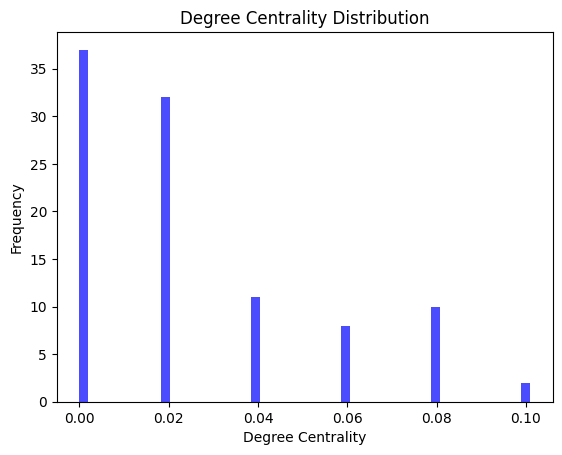

In [39]:
# Step 3: Part (a) - Calculate Centrality Measures and Display Distributions
#1 Degree Centrality
degree_centrality = nx.degree_centrality(subGraph)
degree_values = list(degree_centrality.values())

plt.hist(degree_values, bins=50, color='blue', alpha=0.7)
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.show()

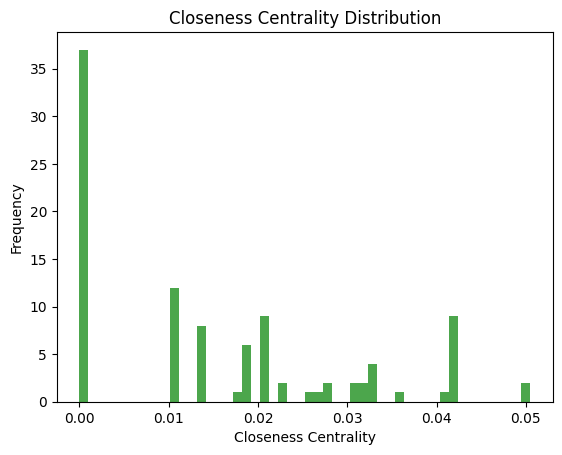

In [40]:
# 2 Closeness Centrality
closeness_centrality = nx.closeness_centrality(subGraph)
closeness_values = list(closeness_centrality.values())

plt.hist(closeness_values, bins=50, color='green', alpha=0.7)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.show()

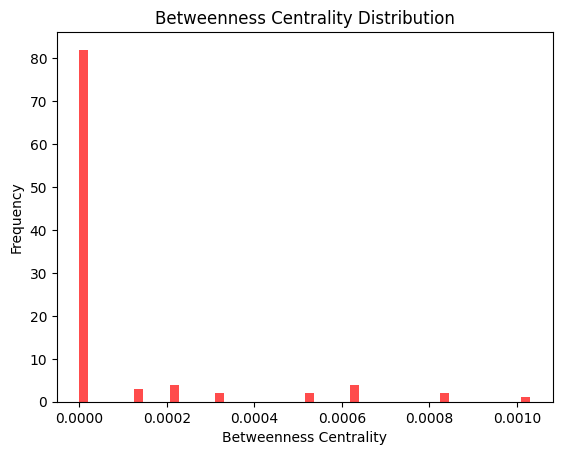

In [41]:
# iii Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(subGraph)
betweenness_values = list(betweenness_centrality.values())

plt.hist(betweenness_values, bins=50, color='red', alpha=0.7)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.show()

In [42]:
# Step 4: Part (b) - Shortest Distance Between Nodes with Highest and Second-Highest Centrality Scores
# Helper Function to Find Top Two Nodes
def get_top_two_nodes(centrality_dict):
    sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_nodes[0][0], sorted_nodes[1][0]
# Shortest Path for Degree Centrality
top_node_deg, second_top_node_deg = get_top_two_nodes(degree_centrality)
shortest_path_deg = nx.shortest_path_length(G, source=top_node_deg, target=second_top_node_deg)
print(f"Shortest path (Degree Centrality): {shortest_path_deg}")

Shortest path (Degree Centrality): 1


In [43]:
# Shortest Path for Closeness Centrality
top_node_close, second_top_node_close = get_top_two_nodes(closeness_centrality)
shortest_path_close = nx.shortest_path_length(G, source=top_node_close, target=second_top_node_close)
print(f"Shortest path (Closeness Centrality): {shortest_path_close}")

Shortest path (Closeness Centrality): 1


In [44]:
# Shortest Path for Betweenness Centrality
top_node_betw, second_top_node_betw = get_top_two_nodes(betweenness_centrality)
shortest_path_betw = nx.shortest_path_length(G, source=top_node_betw, target=second_top_node_betw)
print(f"Shortest path (Betweenness Centrality): {shortest_path_betw}")

Shortest path (Betweenness Centrality): 2


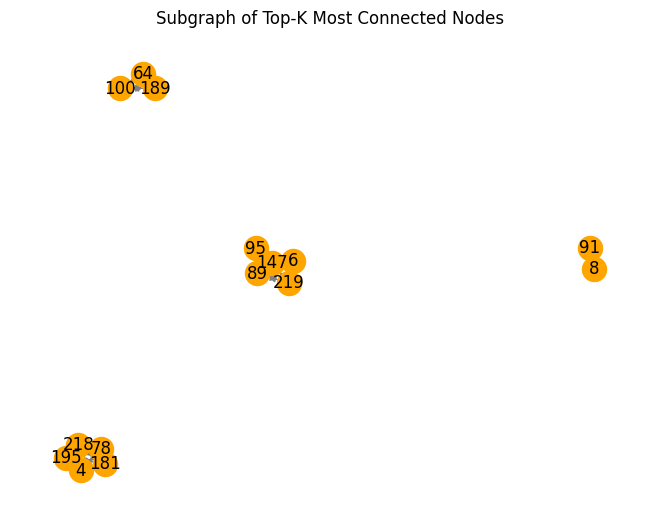

In [45]:
# Step 5: Part (c) - Subgraph with Most Connected Nodes (Degree Centrality)
k = 15  # Number of top nodes to include
top_k_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:k]
top_k_nodes = [node for node, _ in top_k_nodes]

# Create subgraph
subgraph = G.subgraph(top_k_nodes)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='orange', edge_color='gray')
plt.title("Subgraph of Top-K Most Connected Nodes")
plt.show()

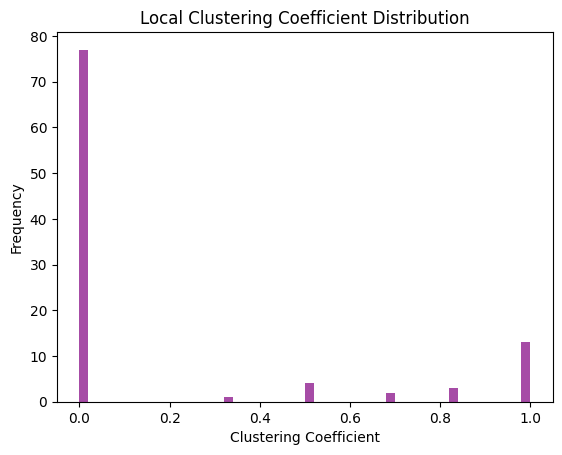

In [46]:
# Step 6: Part (d) - Local Clustering Coefficients and Shortest Distance
clustering_coefficients = nx.clustering(subGraph)
clustering_values = list(clustering_coefficients.values())

plt.hist(clustering_values, bins=50, color='purple', alpha=0.7)
plt.title("Local Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

In [47]:
# Find Top Two Nodes by Clustering Coefficient
top_node_clust, second_top_node_clust = get_top_two_nodes(clustering_coefficients)
shortest_path_clust = nx.shortest_path_length(G, source=top_node_clust, target=second_top_node_clust)
print(f"Shortest path (Clustering Coefficient): {shortest_path_clust}")

Shortest path (Clustering Coefficient): 2


Power-law fit parameters: (0.403766008042953, 0, 2090)


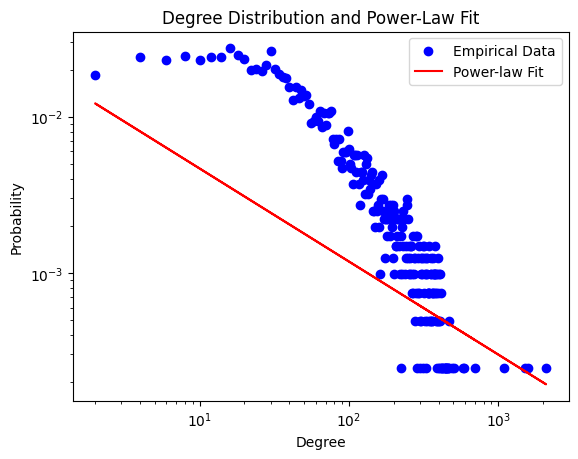

In [48]:
# Step 7: Part (e) - Check for Power-Law Distribution
from scipy.stats import powerlaw

# Fit degree distribution to a power-law
degrees = dict(G.degree()).values()
degree_counts = Counter(degrees)
degree_freq = np.array(list(degree_counts.values()))
degree_values = np.array(list(degree_counts.keys()))

# Normalize frequencies
degree_freq = degree_freq / degree_freq.sum()

# Fit power-law
fit = powerlaw.fit(degree_values, floc=0)
print(f"Power-law fit parameters: {fit}")

# Plot degree distribution and fitted power-law
plt.scatter(degree_values, degree_freq, color='blue', label="Empirical Data")
plt.plot(degree_values, powerlaw.pdf(degree_values, *fit), color='red', label="Power-law Fit")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution and Power-Law Fit")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.legend()
plt.show()